# Predict the Twitter Accounts to be bots or not bots 
# Team Members: 
* Ashish Bansal - Worked on Naive Bayes, Random Forest Classicfication, data preparation 
* John Martinez - Worked on Decision Tree, Random Forest Classicfication, sentiment & gender detection 
* Zhongheng Li - Worked on Logistic Regression,Neural network,Random Forest Classicfication, data preparation & info visulization


# Abstract
In this project we explored how to classify twitter accounts as bots or not-bots accurately. To do this, we harvested several datasets and used them to train our model to distinguish bots from real users. The machine learning algorithms known as Naive bayes, logistic regression, and decision trees were tested. We will present here the results from the most successful of these and upon deciding which algorithm performs the best.


# Data
The data set used is an extract from Twitter API we used the module to query two endpoints: GET user/lookup.json  and GET user/friends/list.json. originally intended to search as tweets by a certain user and tweets of friends of certain user account . The original data set has 130 attributes per user id . This dataset is a mixed set in which we can find many categorical and numerical variables with a lot of missing values. From all the attributes these were the ones that we considered:'id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang',
'status','default_profile','default_profile_image','has_extended_profile','name'. And we also created the new target variable 'bot' based on the results during data collection to indicate if the account is a bot or not bot.


# Description of Variables

The dataset contains 2231 observations of 20 variables:

* 'id' - The integer representation of the unique identifier for this User.
* 'id_str' - The string representation of the unique identifier for this User. 
* 'screen_name' - The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change.
* 'location' - The user-defined location for this account’s profile.
* 'description' - Nullable . The user-defined UTF-8 string describing their account
* 'url' - A URL provided by the user in association with their profile.
* 'followers_count' -The number of followers this account currently has. Under certain conditions of duress.
* 'friends_count' - The number of users this account is following . Under certain conditions of duress. 
* 'listedcount' - Contains the number of public lists that this user is a member of.
* 'created_at' - The UTC datetime that the user account was created on Twitter
* 'favourites_count' - The number of tweets this user has favorited in the account’s lifetime. British spelling used in the field name for historical reasons
* 'verified' - When true, indicates that the user has a verified account.
* 'statuses_count' - The number of tweets (including retweets) issued by the user. 
* 'lang' - The BCP 47 code for the user’s self-declared user interface language. May or may not have anything to do with the content of their Tweets.
* 'status' - If possible, the user’s most recent tweet or retweet. In some circumstances, this data cannot be provided and this field will be null.
* 'default_profile' - When true, indicates that the user has not altered the theme or background of their user profile
* 'default_profile_image' - When true, indicates that the user has not uploaded their own avatar and a default egg avatar is used instead
* 'has_extended_profile' - Indication to show that a user has another profile that is associating with this profile.
* 'name' - The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 20 characters, but subject to change.

# Problem Statement

A [recent research](https://arxiv.org/pdf/1703.03107.pdf) conducted by the University of Southern California and Indiana University, had discovered that 48 millions of Twitter accounts are non human bots. Which is 15% of Twitter's total active user population. Many of these social bots are being used for dissemination of news and publications. But not all bots are disseminating contents that are harmless. Malicious bots are emulating human behaviors to manufacture fake grassroots political support and promote terrorist propagandas and recruitments. On November 1st, 2016, The Atlantic had an [article on how Twitter bots had shaped the 2016 US Presidential election](https://www.theatlantic.com/technology/archive/2016/11/election-bots/506072/). As we are in the age of  information, where social media has great impacts on shaping the social structure and humanity, identifying the malicious socialbots is critical. It is critical for identifying the sources of malicious fake information, and distinguish the malicious ones from the useful bots that are providing helpful functions like alerting disasters and providing useful customer services. In order to achieve this goal, the first step is to distinguish all bots from real users. 





# Import modules

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import entropy
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline


from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
%matplotlib inline





/Users/Heng2j/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Preparion and Data Clearning: 

Import the file and create the dataframe and additional useful features

In [2]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

In [3]:
bots_data = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/bots_data.csv',encoding="ISO-8859-1",header = None, na_values='?',delim_whitespace=False,)
bots_data = bots_data.ix[1:]

nonbots_data = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/nonbots_data.csv',encoding="ISO-8859-1",header = None,na_values='?',delim_whitespace=False,)
nonbots_data = nonbots_data.ix[1:]


data_frames = [bots_data, nonbots_data]

df = pd.concat(data_frames)
df.columns = names




#df = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/merged.csv',encoding="ISO-8859-1",
#                 header=None,delim_whitespace=False,names=names,na_values='?',)





In [4]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
1,3982731976,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,FALSE,23557,en,"{'retweeted': False, 'is_quote_status': False,...",FALSE,FALSE,FALSE,McGucket bot,1
2,8.41E+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,FALSE,1,en,Status(_api=<tweepy.api.API object at 0x101927...,TRUE,TRUE,FALSE,MJ Kuhn,1
3,2768374981,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,FALSE,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,TRUE,FALSE,FALSE,duckNote,1
4,3304189373,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,FALSE,5109,en,"{u'contributors': None, u'truncated': False, u...",FALSE,FALSE,FALSE,robot recipes,1
5,3224289024,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,FALSE,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",TRUE,FALSE,FALSE,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1


In [5]:
df.verified=df.verified.astype('bool')
df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype('bool')
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype('bool')
df.default_profile_image=df.default_profile_image.astype(int)


df.followers_count = df.followers_count.astype(int)
df.friends_count = df.friends_count.astype(int)
df.listedcount = df.listedcount.astype(int)
df.favourites_count = df.favourites_count.astype(int)
df.statuses_count = df.statuses_count.astype(int)
df.bot = df.bot.astype(int)

In [6]:
# Creating more features from given dataframe
df["screen_name_len"] = [len(i) for i in df["screen_name"]]
df["bot_is_substr"] = [int('bot' in i.lower()) for i in df["screen_name"]]
df["bot_in_des"] = [int('bot' in str(i).lower()) for i in df['description']]

# Getting the ages in years from created_at
ages = []
for i in df["created_at"]:
    if len(i) > 20:
        i = i.split()
        year = int(i[5][:4]) % 2000 
    else:
        i = i.split('/')
        year = int(i[2].split()[0]) % 2000
    age = 17-year
    ages.append(age)
df["age"] = ages



In [7]:
# This cell is for adding polarity and subjectivity as features 
from textblob import TextBlob

descriptions = [TextBlob(str(txt)) for txt in df['description']]

# Creating lists of the polarity and the descriptions
desc_pol = [blob.sentiment.polarity for blob in descriptions]
desc_subj = [blob.sentiment.subjectivity for blob in descriptions]

# Turning them into features
df["desc_pol"] = desc_pol
df["desc_subj"] = desc_subj

In [8]:
# gender 
from genderize import Genderize

male = [0] * 2232
female = [0] * 2232
i = 0

names = list(df.name.astype(str))

for name in names:
    name = name.split()
    try:
        gInfo = Genderize().get(name)
        m = 1
        f = 1
        for item in gInfo:
            if item['gender'] == 'male':
                male[i] += item['probability']
                m += 1
            elif item['gender'] == 'female':
                female[i] += item['probability']
                f += 1
        male[i] /= m
        female[i] /= f
    except Exception:
        pass
    
    i += 1

df['male_prob'] = male
df['fem_prob'] = female
        

In [9]:
#Reindex the merged dataframe df
df.reset_index(drop=True, inplace=True)

In [10]:
#Double check to see if there is any duplicated indexes
df[df.index.duplicated()]

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,name,bot,screen_name_len,bot_is_substr,bot_in_des,age,desc_pol,desc_subj,male_prob,fem_prob


In [11]:
#show current info for df after the above chagnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 28 columns):
id                       2232 non-null object
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null int64
friends_count            2232 non-null int64
listedcount              2232 non-null int64
created_at               2232 non-null object
favourites_count         2232 non-null int64
verified                 2232 non-null int64
statuses_count           2232 non-null int64
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null int64
default_profile_image    2232 non-null int64
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                      22

In [12]:
df.shape

(2232, 28)

# Prepare dataframes
Normally randomized the data and split the training dataframe and test dataframe

In [13]:
for a in range(1000):
    randomized_Data = df.reindex(np.random.permutation(df.index))

train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 





In [14]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']


X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

## plotUnivariateROC function to help to visulize the data and model


In [15]:
def plotUnivariateROC(preds, truth, label_string):
 
   
    fpr, tpr, thresholds = roc_curve(truth,preds, pos_label=1)
    roc_auc = auc(fpr,tpr)

    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds,pos_label=1 )
        roc_auc = auc(fpr, tpr)

    c = (np.random.rand(), np.random.rand(), np.random.rand())

    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    return roc_auc

# Traning Models - Naive Bayes
By Ashish Bansal


In [16]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(df.ix[:,0:13], df['bot'], test_size=0.2, random_state=0)

#tf for training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train_NB['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#tf for test data
X_test_counts = count_vect.transform(X_test_NB['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

#classifer training
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train_NB)
#prediction for test data
predicted = clf.predict(X_test_tf)

import numpy as np
np.mean(predicted == y_test_NB)

0.76957494407158833

In [17]:
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(y_test_NB,predicted )))
print("Precision Score: ", (precision_score(y_test_NB,predicted,average='micro' )))
print("Recall Score: ", (recall_score(y_test_NB,predicted,average='micro' )))
print("F1 Score: ", (f1_score(y_test_NB,predicted,average='micro' )))
#print("AUC Score: ", (roc_auc_score(y_test_NB,predicted,average=None )))

Accuracy Score: 0.769574944072
Precision Score:  0.769574944072
Recall Score:  0.769574944072
F1 Score:  0.769574944072


In [18]:
from sklearn import metrics
from sklearn.metrics import *
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr, tpr)

0.77027027027027017

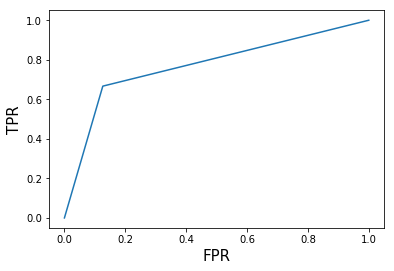

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr,tpr)
#x = np.array(fpr)
#y = np.array(tpr)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot(fpr,tpr)

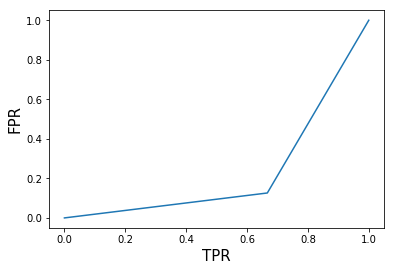

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr,tpr)
plt.ylabel('FPR',fontsize=15)
plt.xlabel('TPR',fontsize=15)
plt.plot(tpr,fpr)

In [21]:
print("Precision Score: ", (precision_score(y_test_NB,predicted,average='weighted' )))

Precision Score:  0.782350851884


In [22]:
preds_lr_nb = clf.predict_proba(X_test_tf)[:, 1]

0.84558558558558561

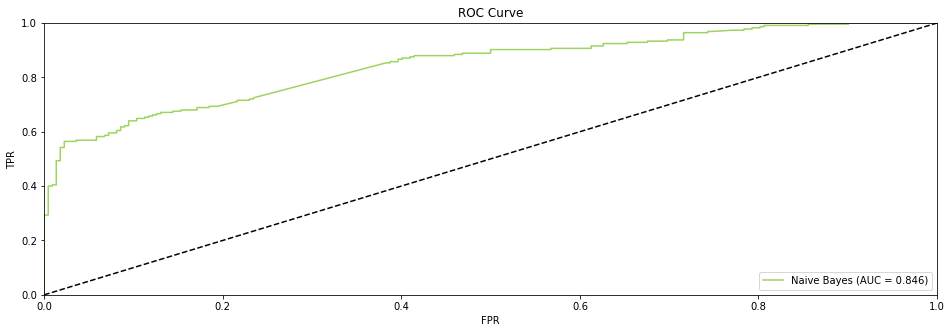

In [28]:
plotUnivariateROC(preds_lr_nb, y_test_NB, 'Naive Bayes')

# Traning Models - Decision Tree
By John Martinez


Traning Average accuracy: 0.8734436691
Traning Average Precision: 0.867211057481
Accuracy on test set:  0.878923766816


{'age': 0.4468709679347373,
 'bot_in_des': 0.014305972951914638,
 'bot_is_substr': 0.0058342823673171815,
 'favourites_count': 0.10629451338052739,
 'followers_count': 0.063193510313412513,
 'friends_count': 0.16690736800772168,
 'listedcount': 0.038951421397701497,
 'screen_name_len': 0.02864615922580253,
 'statuses_count': 0.12899580442086517}

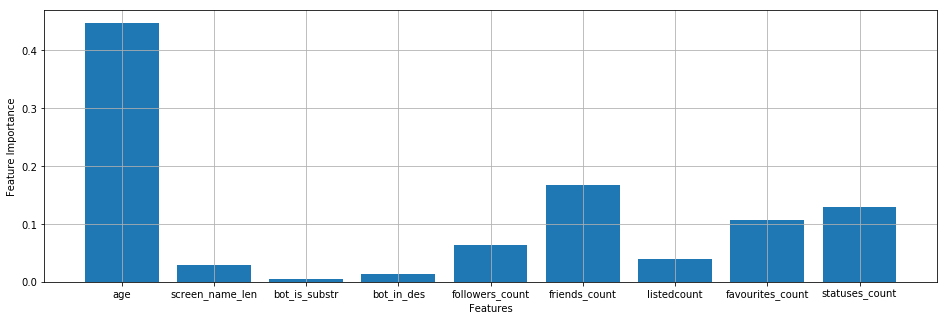

In [24]:
dt = DecisionTreeClassifier(criterion='entropy')

# treeNames are only the numerical and binary features with importance > 0 
treeNames=['age','screen_name_len', 'bot_is_substr','bot_in_des','followers_count','friends_count','listedcount', 'favourites_count','statuses_count']

# Getting the training sets and fitting the tree
df_train = train_df[treeNames+['bot']]
x_train = train_df[treeNames]
y_train = train_df.bot.astype(bool)
dt.fit(x_train, y_train)

# Evaluating the tree with cross-val
accuracy = cross_val_score(dt, x_train, y_train, cv=5, scoring = "accuracy")
precision = cross_val_score(dt, x_train, y_train, cv=5, scoring = "precision")

# Graphing the feature importance 
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi_dict = dict(zip(df_train.columns.values,dt.feature_importances_))
feature_mi_dict
feature_importance_X = feature_mi_dict.keys()
feature_importance_Y = feature_mi_dict.values()
plt.rcParams['figure.figsize'] = (16, 5)
plt.bar(range(len(feature_mi_dict)), feature_mi_dict.values(), align='center')
plt.xticks(range(len(feature_mi_dict)), feature_mi_dict.keys())
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.grid(True)

# Printing the evaluations 
print("Traning Average accuracy:",accuracy.mean())
print("Traning Average Precision:",precision.mean())


predicts = dt.predict(X_test[treeNames])

Test_accuracy = metrics.accuracy_score(test_df['bot'], predicts)

print('Accuracy on test set: ',Test_accuracy )





feature_mi = dt.feature_importances_

feature_mi

feature_mi_dict = dict(zip(x_train.columns.values,feature_mi))

feature_mi_dict

## Use entropy of decision tree to evlauate the importance of features

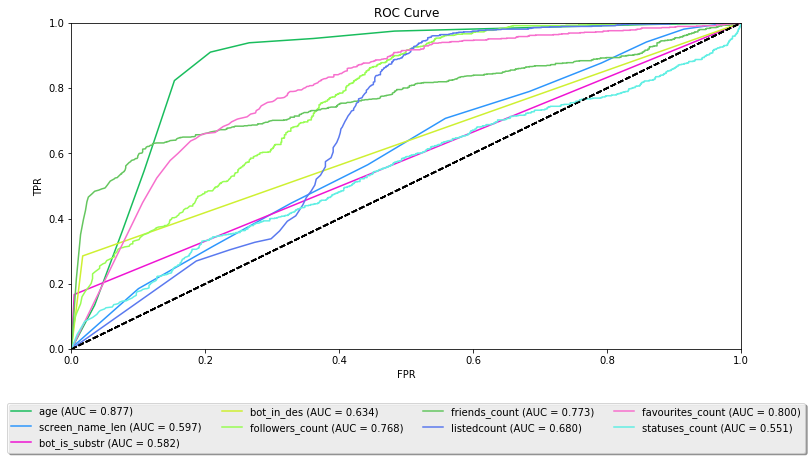

In [26]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)


train_df_modf = train_df[treeNames]


feature_auc_dict = {}
for col in train_df_modf.columns:
    feature_auc_dict[col] = plotUnivariateROC(train_df_modf[col], Y_train, col)


box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [29]:
# Splitting the set 80-20 with train_test_split from sklearn metrics
#bot = df['bot']
#X_train, X_test, Y_train, Y_test = train_test_split(df[treeNames].ix[:,0:13], bot, test_size=0.2, random_state=42)


min_samples_split_values = list(range(20,70,5))
min_samples_leaf_values = list(range(20,30,1))

test_set_accuracy = []

for i in range(10):
    
    min_samples_split_value = min_samples_split_values[i]
    for j in range(10):
        min_samples_leaf_value = min_samples_leaf_values[j]    
        
        # Fitting and evaluating a tree
        splitDt = DecisionTreeClassifier(criterion='entropy',max_depth = 5, min_samples_split = min_samples_split_value,  min_samples_leaf = min_samples_leaf_value)
        splitDt.fit(X_train[treeNames], Y_train)
        predict = splitDt.predict(X_test[treeNames])
        accuracy = metrics.accuracy_score(predict, Y_test)
    
        test_set_accuracy.append(accuracy)

        
        
print("Maximum Test Accuracy:", max(test_set_accuracy),"\nMinimum Test Accuracy:", min(test_set_accuracy))
print("Average Test Accuracy:",sum(test_set_accuracy)/len(test_set_accuracy))

Maximum Test Accuracy: 0.863228699552 
Minimum Test Accuracy: 0.863228699552
Average Test Accuracy: 0.863228699552


In [30]:
#Cross Validation Scores:


precision = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'precision')
avg_precision = sum(precision) / 5


recall = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'recall')
avg_recall = sum(recall) / 5


F1 = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'f1')
avg_F1 = sum(F1) / 5

AUC = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'roc_auc')
avg_AUC = sum(AUC) / 5



print('Cross-validation:')


print('Using decision tree for precision score:', precision)
print('Take the average of decision tree precision score:', avg_precision )
print('' )

print('Using decision tree for recall score:', recall )
print('Take the average of recall score:', avg_recall )
print('' )



print('Using decision tree for F1 score:', F1 )
print('Take the average of decision tree F1 score:', avg_F1 )
print('' )



print('Using decision tree for AUC score:', AUC )
print('Take the average of decision tree AUC score:', avg_AUC )
print('' )
print('' )



Cross-validation:
Using decision tree for precision score: [ 0.8         0.9047619   0.90243902  0.76595745  0.86486486]
Take the average of decision tree precision score: 0.847604648165

Using decision tree for recall score: [ 0.86363636  0.88636364  0.81818182  0.84090909  0.74418605]
Take the average of recall score: 0.830655391121

Using decision tree for F1 score: [ 0.85106383  0.88636364  0.84705882  0.8         0.8       ]
Take the average of decision tree F1 score: 0.836897257936

Using decision tree for AUC score: [ 0.84634387  0.89970356  0.90959596  0.78686869  0.80542636]
Take the average of decision tree AUC score: 0.849587686777




In [31]:
preds_dt=dt.predict_proba(X_test[treeNames])[:,1]

0.87864341319172046

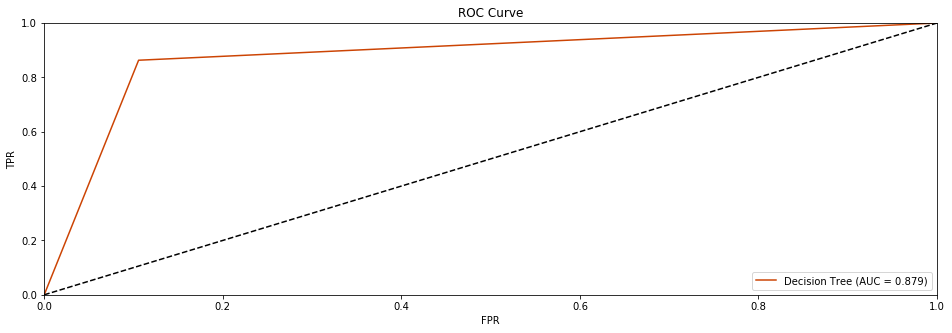

In [32]:
plotUnivariateROC(preds_dt, Y_test, 'Decision Tree')

# Traning Models - Logistic Regression
By Zhongheng Li

Since our problem is a clasification problem, logistic regression is the more suiltable model that we can use for our predition. 




In [33]:
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']


X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

In [34]:
#Flatten the target variable on both traning and test set for logistic regression
Y_train_LR = np.ravel(Y_train)
Y_test_LR =  np.ravel(Y_test)

In [35]:
#Select the features

# features are only the numerical and binary features 
features=['age','followers_count','friends_count','listedcount', 'verified', 'favourites_count','statuses_count','default_profile','default_profile_image','screen_name_len','bot_is_substr','bot_in_des']

features

['age',
 'followers_count',
 'friends_count',
 'listedcount',
 'verified',
 'favourites_count',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'screen_name_len',
 'bot_is_substr',
 'bot_in_des']

In [36]:
# To train our model with above features
model = LogisticRegression()
model = model.fit(X_train[features], Y_train_LR)

# check the accuracy on the training set with the test set data
print('Initial Traning Accuracy:',model.score(X_train[features], Y_train_LR))
print('Initial Test Accuracy:',model.score(X_test[features], Y_test_LR))

Initial Traning Accuracy: 0.728443449048
Initial Test Accuracy: 0.715246636771


In [37]:
#Examine the coefficients to evaluate the weights for each features above
pd.DataFrame(list(zip(X_train[features].columns, np.transpose(model.coef_))))




,0,1
0,age,[-1.59006385563e-05]
1,followers_count,[-3.16353583699e-07]
2,friends_count,[5.4674462297e-06]
3,listedcount,[-0.000738369175045]
4,verified,[1.3459534693e-06]
5,favourites_count,[-0.000118496786759]
6,statuses_count,[1.96389117413e-05]
7,default_profile,[1.3459534693e-06]
8,default_profile_image,[1.3459534693e-06]
9,screen_name_len,[2.037412102e-05]


In [38]:
#Reduce features that has negative coefficients and high frustration. And than manually compute the accuracies by remove the remaining features one at a time to compute the highest accuracy
#Eventually, we picked 'followers_count','friends_count','favourites_count','statuses_count'
features=['followers_count','friends_count','favourites_count','statuses_count']


#Train the model again with new updated features
model = LogisticRegression()
model = model.fit(X_train[features], Y_train_LR)

# check the accuracy on the training set with the test set data
print('Updated Traning Accuracy:',model.score(X_train[features], Y_train_LR))
print('Updated Test Accuracy:',model.score(X_test[features], Y_test_LR))

Updated Traning Accuracy: 0.755879059351
Updated Test Accuracy: 0.739910313901


In [39]:
#Exmine the coefficients again to evaluate the weights for each features above
pd.DataFrame(list(zip(X_train[features].columns, np.transpose(model.coef_))))




,0,1
0,followers_count,[-3.15791507291e-06]
1,friends_count,[3.69174272145e-06]
2,favourites_count,[-0.000140416826862]
3,statuses_count,[1.52027261533e-05]


# Logistic Regression Model with Visulization
Since friends_count contains the highest coefficients from our latest evaluation, we will visulize it's correlation with our target variable 'bot'.

In [40]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

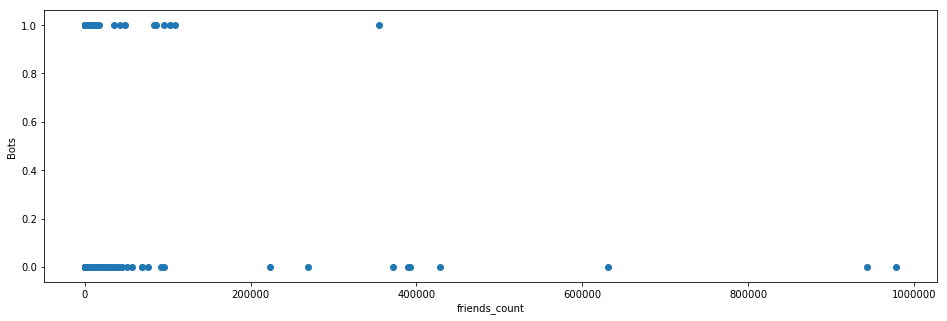

In [41]:
plt.scatter(df.friends_count, df.bot)
plt.xlabel('friends_count')
plt.ylabel('Bots')

When we plot the friends_count and bot into our graph, we clearly can see that real human user can have more friends_count than bots.

In [42]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['friends_count']
X_LR2 = df[feature_cols]
y_LR2 = df.bot
logreg.fit(X_LR2, y_LR2)



LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
df['Bot_prob'] = logreg.predict_proba(X_LR2)[:, 1]

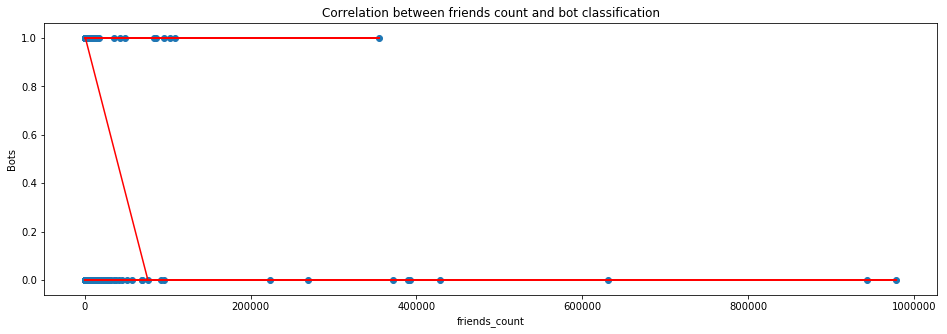

In [44]:
# plot the predicted probabilities
plt.scatter(df.friends_count, df.bot)
plt.plot(df.friends_count, df.bot, color='red')
plt.xlabel('friends_count')
plt.ylabel('Bots')
plt.title('Correlation between friends count and bot classification' )

## Logistic Regression Model Evaluation Using a Validation Set

In [45]:
X_LR = df.drop('bot', 1)
Y_LR = df['bot']

In [46]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train_LR[features], y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#Get the predicted value with test set
predicted = model2.predict(X_test_LR[features])

# generate class probabilities
probs = model2.predict_proba(X_test_LR[features])

In [48]:
print ('Accuracy Score:',metrics.accuracy_score(y_test_LR, predicted))
print ('ROC AUC Score:', metrics.roc_auc_score(y_test_LR, probs[:, 1]))

Accuracy Score: 0.742729306488
ROC AUC Score: 0.865325325325


In [49]:
print ('Classifictiaon Report:')
print ( metrics.classification_report(y_test_LR, predicted))

Classifictiaon Report:
             precision    recall  f1-score   support

          0       0.74      0.75      0.74       222
          1       0.75      0.73      0.74       225

avg / total       0.74      0.74      0.74       447



In [50]:
preds_lr=model.predict_proba(X_test[features])[:,1]

0.84792710156297135

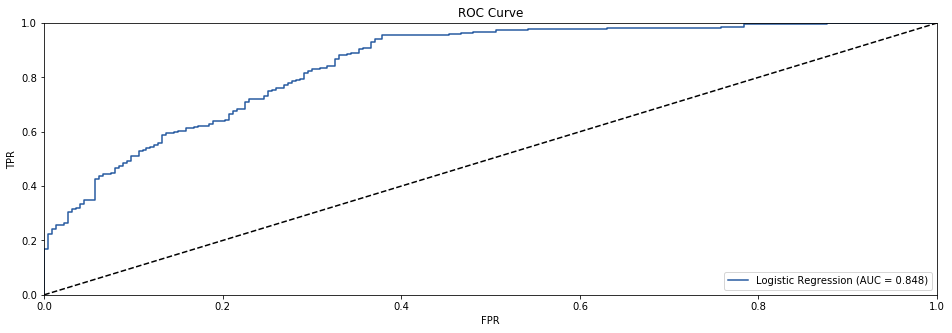

In [51]:
plotUnivariateROC(preds_lr, Y_test_LR, 'Logistic Regression')

## Logistic Regression Model Evaluation Using Cross-Validation


In [52]:
#Cross validation with 10 folds
accuracy = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='accuracy', cv=10)

print ('Accuracy: ',accuracy.mean())

precision = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='precision', cv=10)

print ('Precision: ',precision.mean())

recall = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='recall', cv=10)

print ('Recall: ',recall.mean())


F1 = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='f1', cv=10)

print ('F1: ',F1.mean())


ROC_AUC = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='roc_auc', cv=10)

print ('ROC_AUC: ',ROC_AUC.mean())

Accuracy:  0.747627091377
Precision:  0.716093277091
Recall:  0.77358490566
F1:  0.743140539575
ROC_AUC:  0.839856021166


# Traning Models - Neural network
by Zhongheng Li (Heng)

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
X_train_NN = train_df.drop('bot', 1)
Y_train_NN = train_df['bot']


X_test_NN = test_df.drop('bot', 1)
Y_test_NN = test_df['bot']

In [55]:
# features are only the numerical and binary features 
features=['age','followers_count','friends_count','listedcount', 'verified', 'favourites_count','statuses_count','default_profile','default_profile_image','screen_name_len','bot_is_substr','bot_in_des']

features

['age',
 'followers_count',
 'friends_count',
 'listedcount',
 'verified',
 'favourites_count',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'screen_name_len',
 'bot_is_substr',
 'bot_in_des']

In [56]:
X_train_NN = X_train_NN[features]


X_test_NN = X_test_NN[features]

In [57]:

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train_NN, Y_train_NN)      

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
predict_NN = clf_NN.predict(X_test_NN)

predict_NN

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0,

In [59]:
NN_accuracy = metrics.accuracy_score(predict_NN, Y_test_NN)
NN_accuracy  

0.56502242152466364

In [60]:
[coef.shape for coef in clf_NN.coefs_]

[(12, 5), (5, 2), (2, 1)]

In [61]:
X_NN = df.drop('bot', 1)
Y_NN = df['bot']

In [62]:
#Cross validation with 10 folds
accuracy = cross_val_score(clf_NN, X_NN[features], Y_NN, scoring='accuracy', cv=10)

print ('Accuracy: ',accuracy.mean())

precision = cross_val_score(clf_NN, X_NN[features], Y_NN, scoring='precision', cv=10)



print ('Precision: ',precision.mean())

recall = cross_val_score(clf_NN, X_NN[features], Y_NN, scoring='recall', cv=10)

print ('Recall: ',recall.mean())


F1 = cross_val_score(clf_NN, X_NN[features], Y_NN, scoring='f1', cv=10)

print ('F1: ',F1.mean())


ROC_AUC = cross_val_score(clf_NN, X_NN[features], Y_NN, scoring='roc_auc', cv=10)

print ('ROC_AUC: ',ROC_AUC.mean())

Accuracy:  0.564044401544
Precision:  0.527233379635
Recall:  0.912884097035
F1:  0.666424477771
ROC_AUC:  0.689800247988


In [63]:
preds_NN = clf_NN.predict_proba(X_test_NN)[:,1]

0.71486331543057158

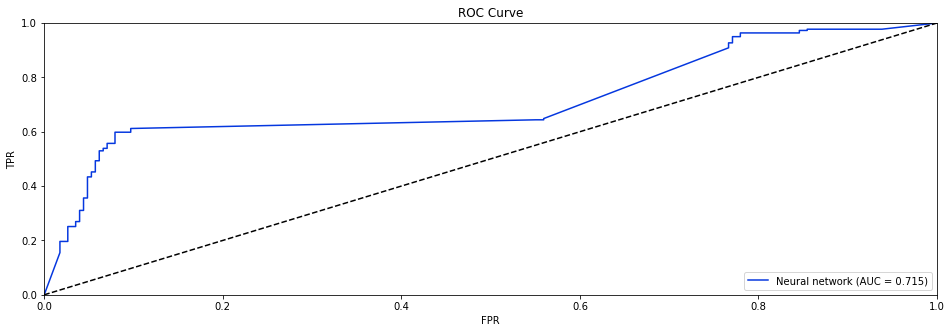

In [64]:
plotUnivariateROC(preds_NN, Y_test_NN, 'Neural network')

# Traning Models - Random Forest Classifier

In [65]:
X_train_RF = train_df.drop('bot', 1)
Y_train_RF = train_df['bot']


X_test_RF = test_df.drop('bot', 1)
Y_test_RF = test_df['bot']

In [66]:
features = ['age','followers_count','friends_count','listedcount','favourites_count','statuses_count','screen_name_len','bot_in_des','bot_is_substr', 'desc_pol','desc_subj']
#features = ['age','followers_count','friends_count','favourites_count','statuses_count','bot_in_des']

In [67]:
X_train_RF_filtered =  X_train_RF[features]

X_test_RF_filtered = X_test_RF[features]

In [71]:
clf = RandomForestClassifier(n_estimators=200, oob_score=False, criterion = "entropy")


clf.fit(X_train_RF_filtered, Y_train_RF)
predicted = clf.predict(X_test_RF_filtered)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_RF,predicted)

0.92152466367713004

In [72]:
# The highest score we had from the iteration was:
0.9327354260089686

0.9327354260089686

In [73]:
preds_RF = clf.predict_proba(X_test_RF_filtered)[:,1]

0.96691006376601685

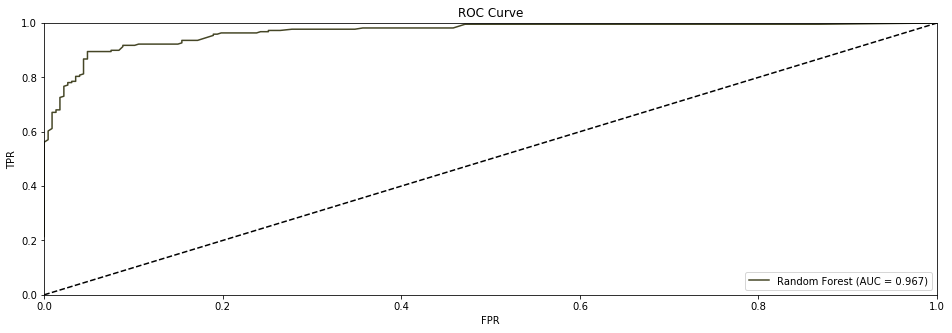

In [74]:
plotUnivariateROC(preds_RF, Y_test_RF, 'Random Forest')

# ROC curve evaluation for all models
by Zhongheng Li

0.84558558558558561

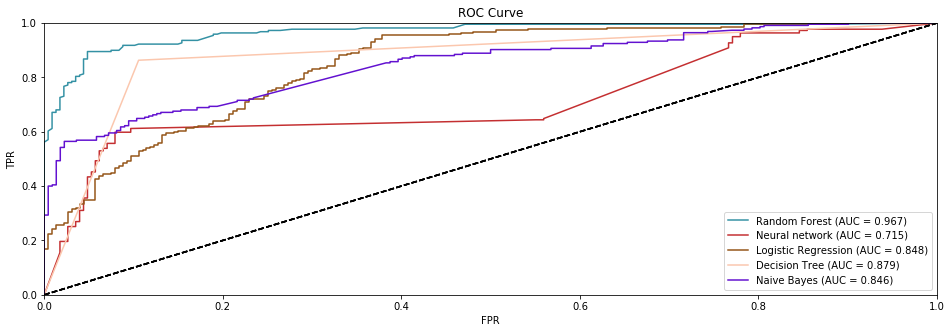

In [76]:
plotUnivariateROC(preds_RF, Y_test_RF, 'Random Forest')
plotUnivariateROC(preds_NN, Y_test_NN, 'Neural network')
plotUnivariateROC(preds_lr, Y_test_LR, 'Logistic Regression')
plotUnivariateROC(preds_dt, Y_test, 'Decision Tree')
plotUnivariateROC(preds_lr_nb, y_test_NB, 'Naive Bayes')